##Bank Marketing Dataset-Capstone project


Data science is a ubiquitous field and banks are also recruiting data analysts and data scientists to increase their market value by selling their products. To accomplish their goals banks want to identify customers who can buy their products such as credit cards, fixed deposits and term deposits and may take loans. To achieve their targets, the bank’s marketing strategies have to be efficient so they can examine the results from marketing campaigns for each customer and identify important factors that may play an efficient role in their campaigns.  

Dataset 


This dataset is based on the "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_a = pd.read_csv("bank.csv",sep = ';', header = 0)
df_a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
df_b = pd.read_csv("bank-full.csv",sep = ';', header = 0)
df_b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
df=pd.concat([df_b,df_a])  #concatinating two tables into a single table  
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [12]:
df.info()  # It gives all the information of no of rows and columns and dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [18]:
df.nunique() #It gives the column unique values 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [19]:
cat_col=[cat for cat in df.columns if ((df[cat].dtype=="O") & (cat not in ['y']))]
cat_col  #we are using list comprehension if the df type= objective which we get all the categorical columns 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) # It gives all the unique columns inside the columns of categorical column

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [21]:
num_col=[num for num in df.columns if ((df[num].dtypes != "O") & (num not in ['y']))]
df[num_col].head()  #It gives all the numeric columns which are not objective type

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [22]:
d=df[num_col]

In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age: minimum age of the bank’s client’s is 18 while the maximum age is 95. The average age of the customers is 41.

balance: the mean customer balance is 1367.76, while the minimum balance is -8019.00. The maximum balance stands at 102127.00.

duration: the maximum duration in seconds of a single contact was 4918 seconds, while the shortest duration of a contact with a client lasted for 0 seconds.

campaign: the maximum number of contacts made in the campaign to a single client is 63 while the minimum number of contacts is 1. The average number of contacts made was 2.7.

pdays: a maximum of 871 days passed by after a client was last contacted, while a minimum of -1 days passed by after a client was last contacted.

previous: a maximum of 275 contacts were made previously to a single client before the current campaign., while a minimum of 0 contacts were previously made.

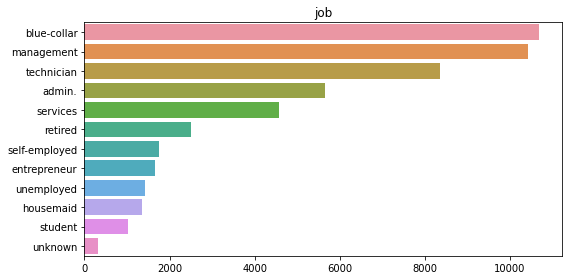

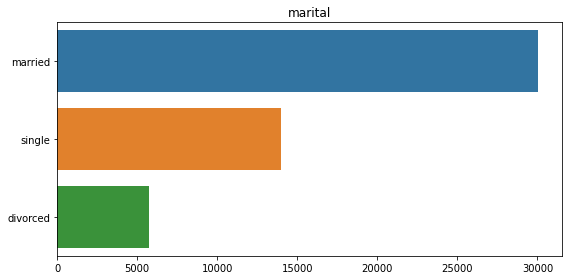

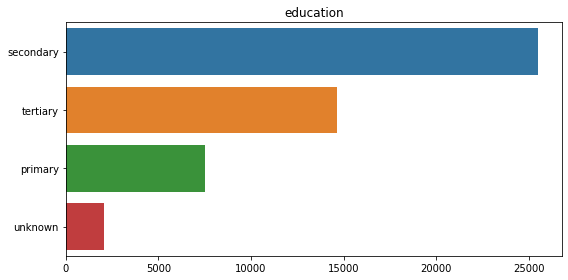

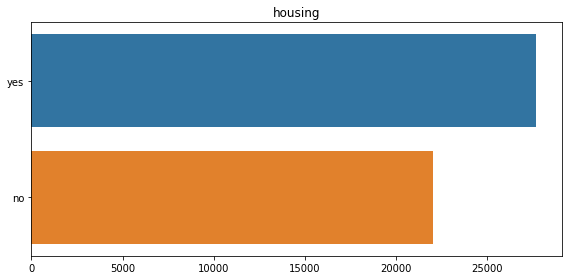

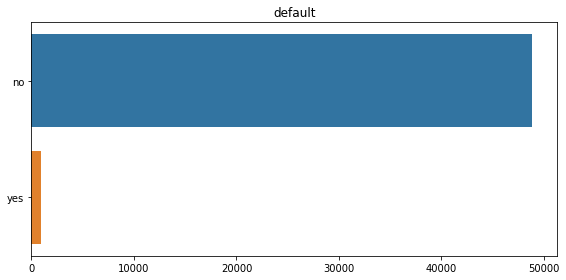

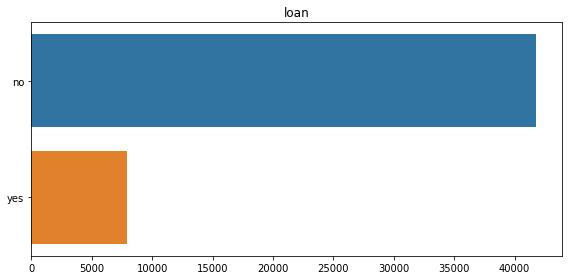

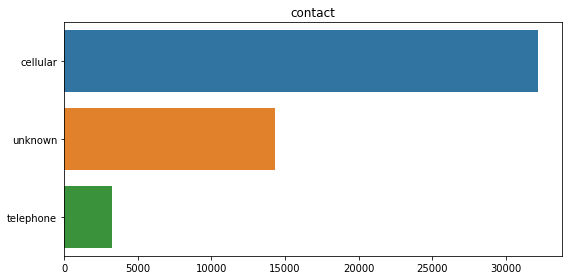

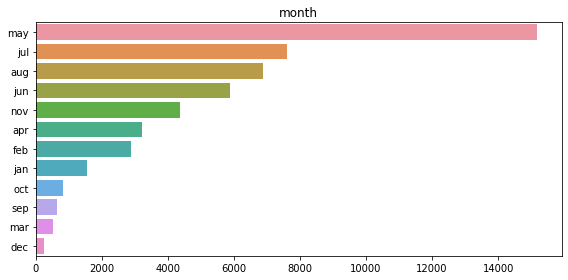

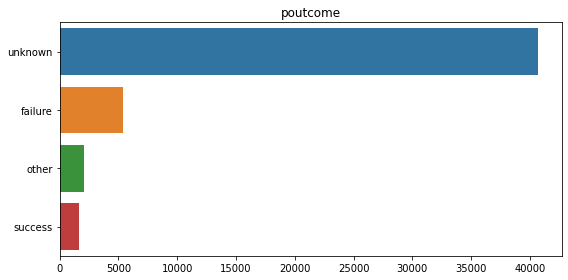

In [24]:
categorcial_variables = ['job', 'marital', 'education','housing', 'default', 'loan', 'contact', 'month', 'poutcome']
for col in categorcial_variables:
    plt.figure(figsize=(8,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
plt.show()

In job blue-collor and management are high no of clients   
Married clients are high in the dataset, 
Secondary education are high in the dataset   
Most of them are having their house and most of them are note intrested in loan   
May month has highest no of count followed by Jul


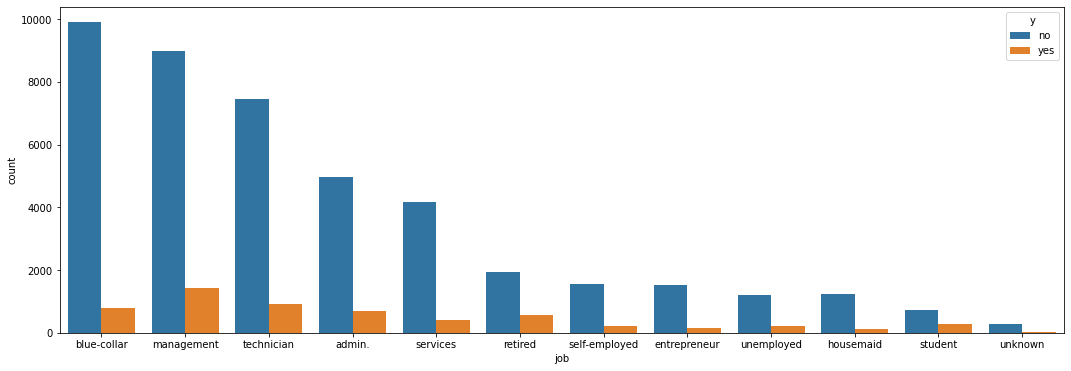

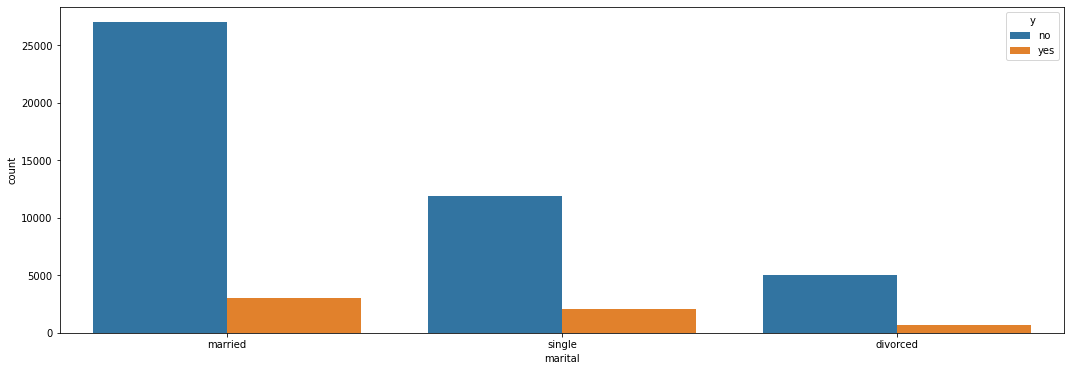

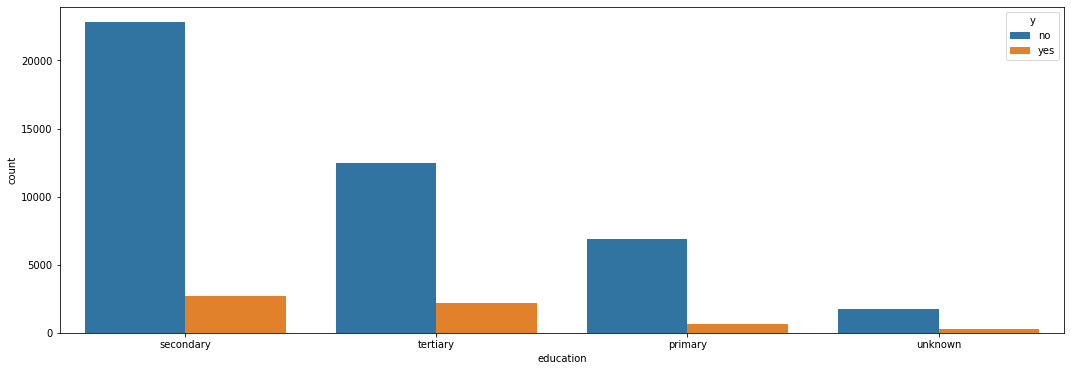

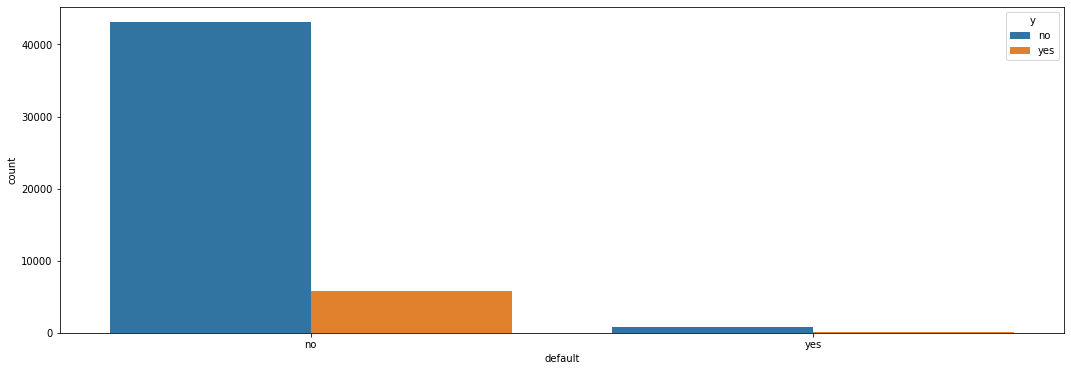

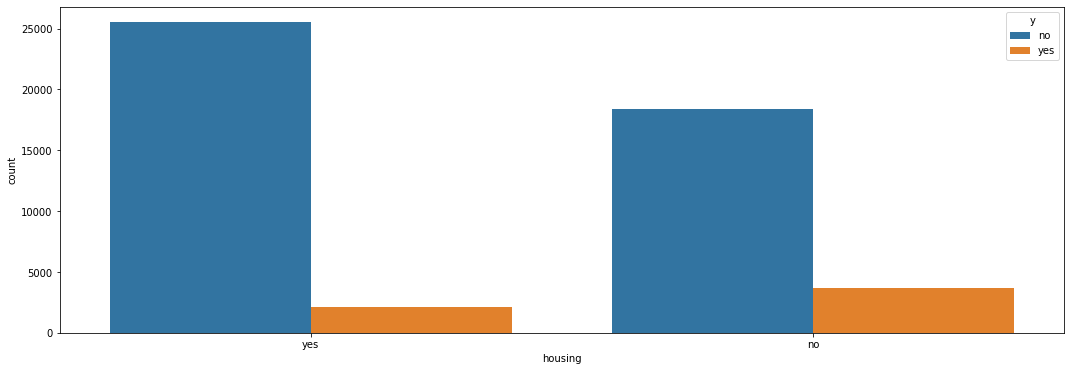

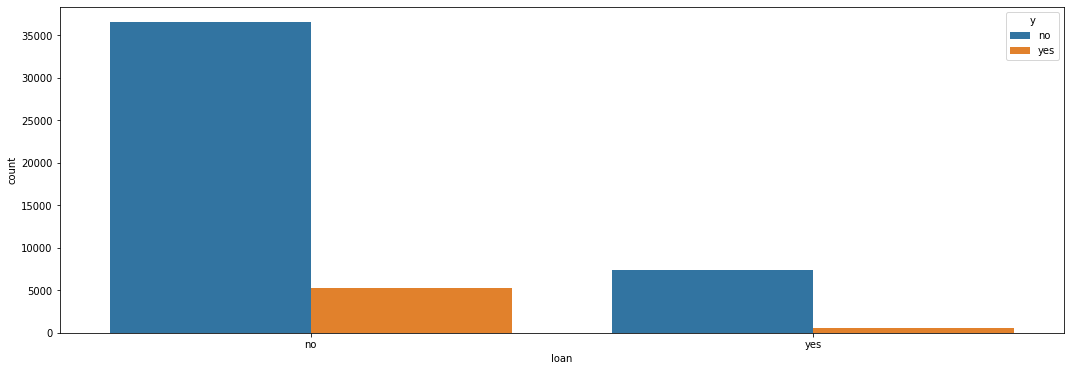

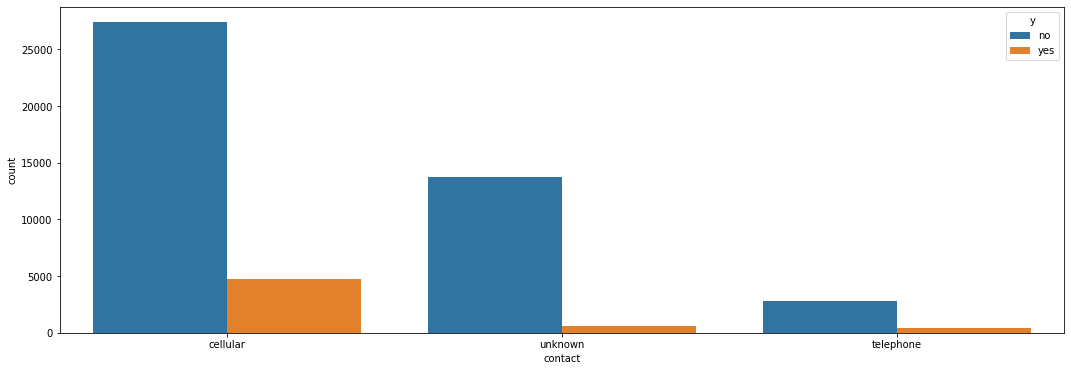

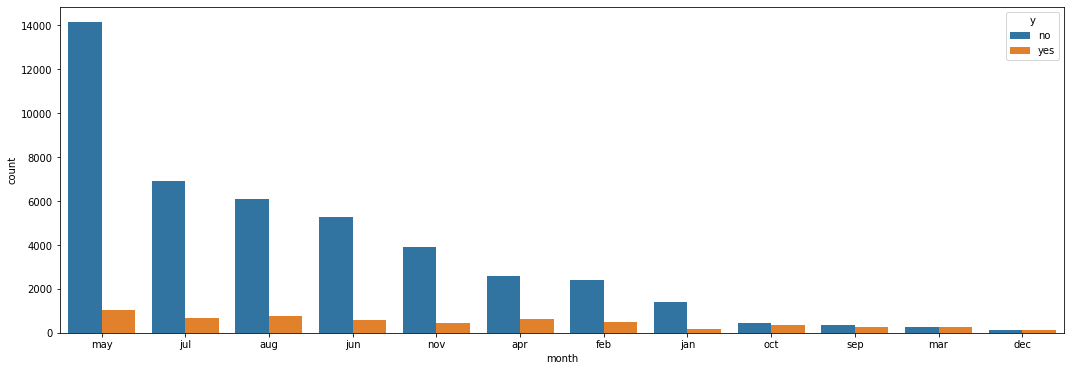

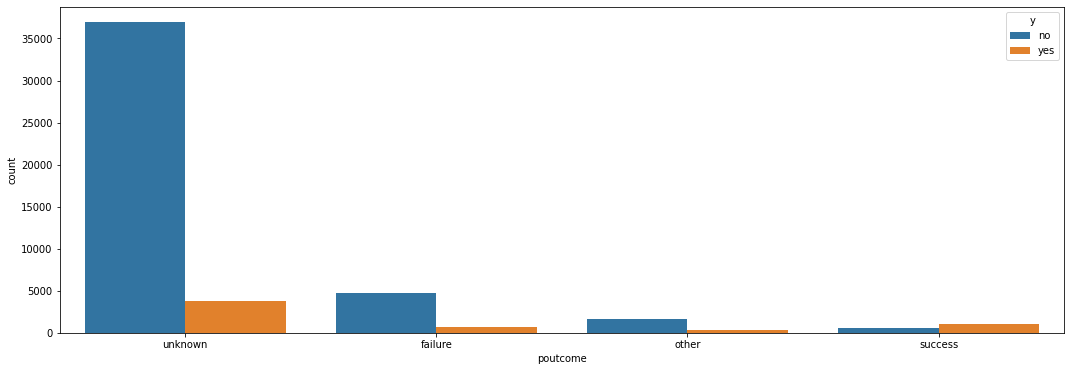

In [25]:
for c in cat_col:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = df,order = df[c].value_counts().index)
    #cat_col which gives all the categorical feathers, we are using countplot with a target variable

In [26]:
df.groupby(['housing','y']).size()

housing  y  
no       no     18388
         yes     3655
yes      no     25534
         yes     2155
dtype: int64

The clients who are having no house are showing intrest on deposit and who are having house not showing intrest on deposit as shown in the above fig of housing

In [27]:
df.groupby(['marital','y']).size()

marital   y  
divorced  no      5036
          yes      699
married   no     26979
          yes     3032
single    no     11907
          yes     2079
dtype: int64

Married people are showing intrest on deposit and as well as single are having high ratio on deposits 

In [28]:
df.groupby(['job','y']).size()

job            y  
admin.         no     4960
               yes     689
blue-collar    no     9901
               yes     777
entrepreneur   no     1517
               yes     138
housemaid      no     1229
               yes     123
management     no     8995
               yes    1432
retired        no     1924
               yes     570
self-employed  no     1555
               yes     207
services       no     4164
               yes     407
student        no      734
               yes     288
technician     no     7442
               yes     923
unemployed     no     1216
               yes     215
unknown        no      285
               yes      41
dtype: int64

In [29]:
df.groupby(['loan','y']).size()

loan  y  
no    no     36514
      yes     5283
yes   no      7408
      yes      527
dtype: int64

The clients who dont have personal loan are showing intrest in deposit

In [30]:
df[df["y"] == "yes"].mean() #which gives all the average values of deposits

age           41.743718
balance     1783.435800
day           15.203098
duration     538.679862
campaign       2.152324
pdays         68.697246
previous       1.163167
dtype: float64

Thus, the average age of the attracted clients is about 40 (age = 41.74), 
and 2 calls were required to attract them (campaign = 2.15)

In [31]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no
19639,37,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,no


The sorting results show that the longest calls exceed one hour,
as the value duration is more than 4918 seconds, it was in the month of november

In [32]:
df.sort_values(by = ["campaign","duration"] , ascending = [True, True])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31740,39,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
24994,36,blue-collar,married,primary,no,871,yes,yes,telephone,18,nov,2,1,-1,0,unknown,no
30278,54,unemployed,divorced,secondary,no,925,no,no,cellular,5,feb,2,1,-1,0,unknown,no
2177,43,blue-collar,married,primary,no,0,yes,no,unknown,12,may,3,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no


In [ ]:
#the min compaign performed is 1time for 1 sec and max campaign is 63 times with the duration of 124sec

In [33]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43637,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
44644,18,student,single,unknown,no,438,no,no,cellular,1,sep,425,1,-1,0,unknown,no
42146,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
40887,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
42274,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes


We see that the youngest customers are at the age of 18, and the call duration exceeded above 400 sec, 
which indicates the ineffectiveness of long-term interaction with such clients

<BarContainer object of 49732 artists>

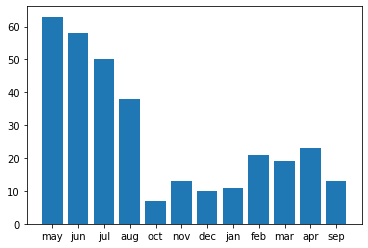

In [24]:
plt.bar(df['month'], df['campaign'])

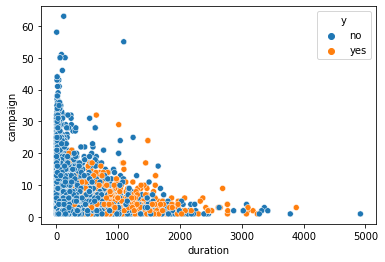

In [34]:
sns.scatterplot(x="duration",
                    y="campaign",hue='y',
                   data=df)

by seeing this plot we can say that as the contact people who have long duration talk have more deposite 
and less duration talk has no deposite from clients

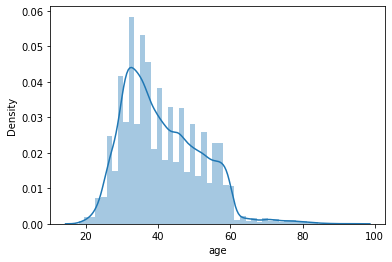

In [26]:
sns.distplot(df['age'])
plt.show()

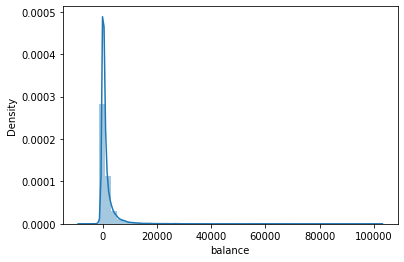

In [27]:
sns.distplot(df['balance'])
plt.show()

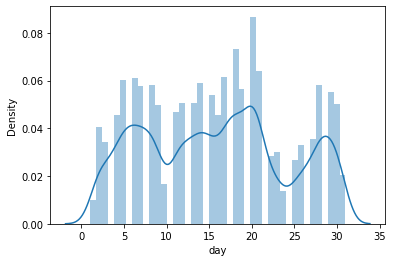

In [28]:
sns.distplot(df['day'])
plt.show()

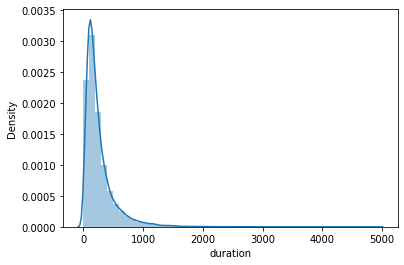

In [29]:
sns.distplot(df['duration'])
plt.show()

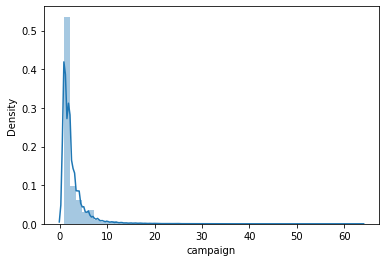

In [30]:
sns.distplot(df['campaign'])
plt.show()

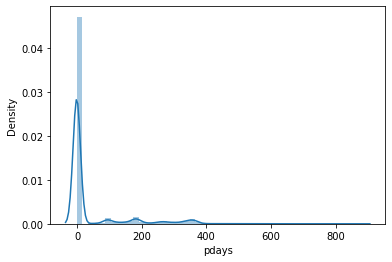

In [31]:
sns.distplot(df['pdays'])
plt.show()

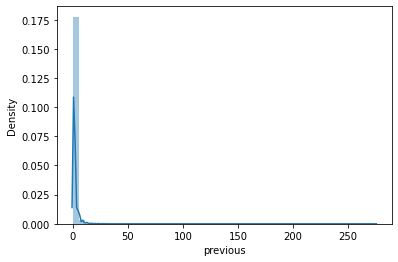

In [32]:
sns.distplot(df['previous'])
plt.show()

These plots are squewed and some are having negetative values also 

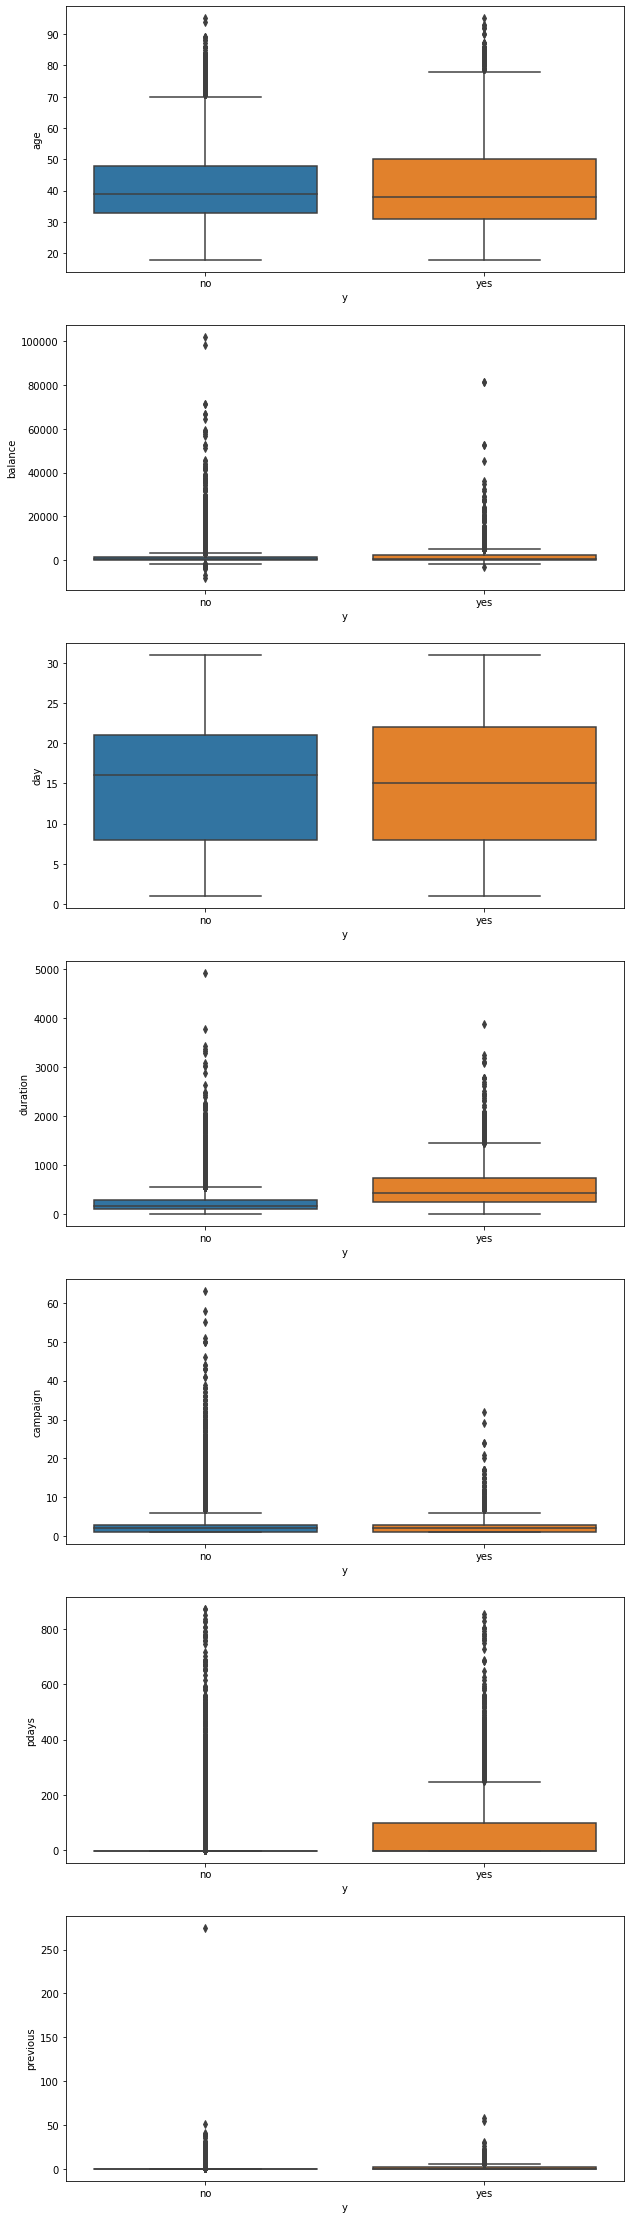

In [33]:
fig, axes = plt.subplots(7, 1, figsize=(10, 40))
for i, c in enumerate(num_col):
  sns.boxplot(data=df,x='y',y=c,ax=axes[i]) #boxplot for cat column 

client shows interest on deposit who had discussion for longer duration

In [35]:
#finding the outliers 

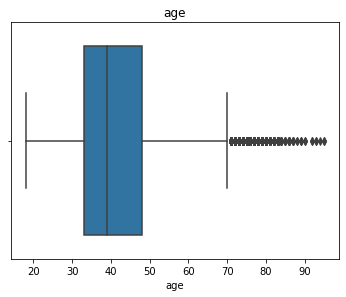

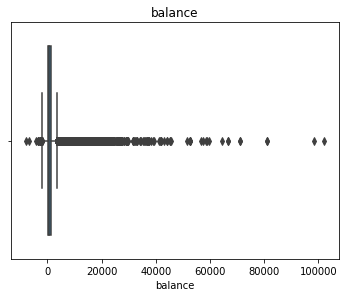

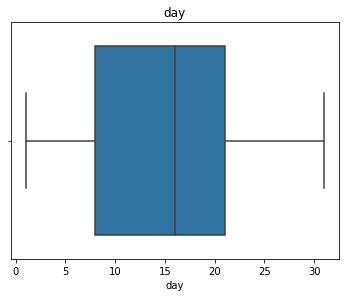

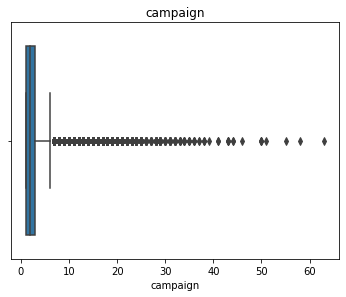

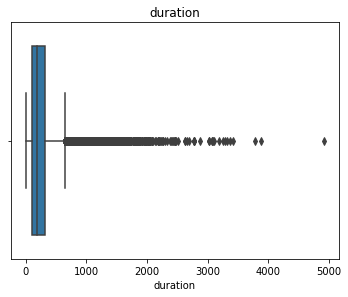

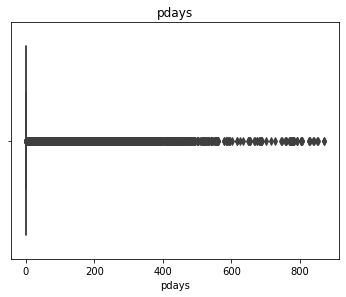

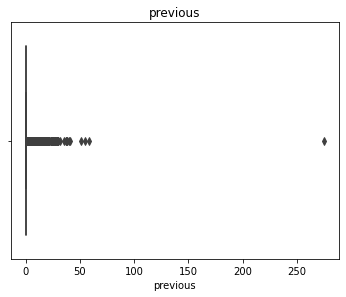

In [36]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

In [37]:
#age, balance, duration, compaign, pdays and previous has some outliers

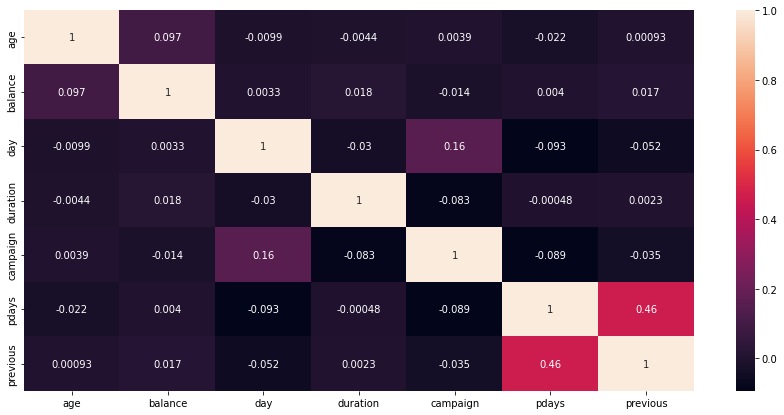

In [38]:
cor_mat =df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat ,annot=True)

In [39]:
d #now for numerical columns 

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [ ]:
#converting categorical columns into numerica columns 
#replacing  'yes':1,'no':0,'unknown':-1 

In [40]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)

In [41]:
dictionary1={'no':0,'yes':1}
df['y']=df['y'].map(dictionary1)

In [42]:
df.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,1,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,0,0,0,0


In [43]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [ ]:
#removing outliers 

In [ ]:
#copying data to another data 

In [44]:
dff=df.copy()

Text(0.5, 1.0, 'pdays')

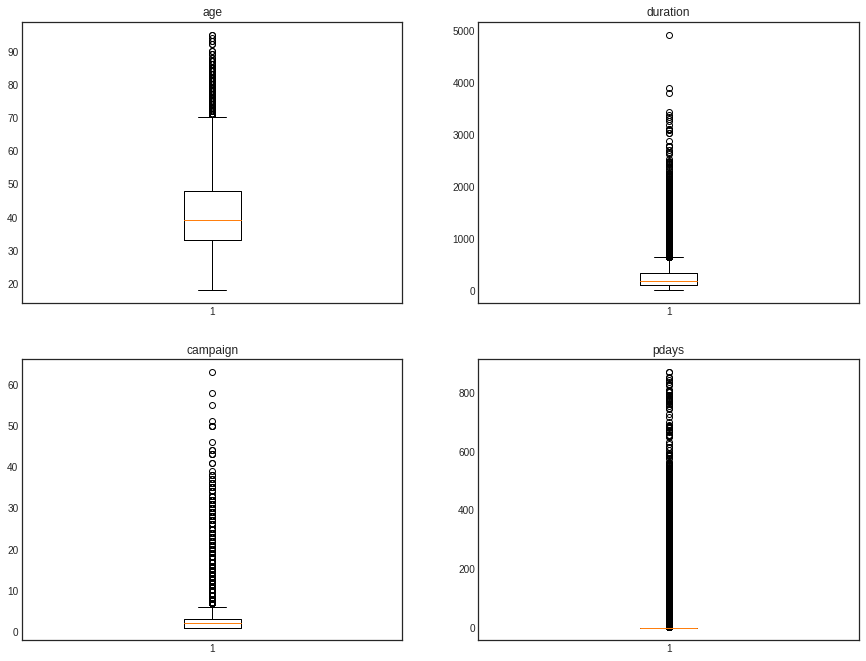

In [45]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(dff['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(dff['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(dff['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(dff['pdays'])
ax.set_title('pdays')


In [ ]:
#removing outliers with Iqr technique 

In [46]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = dff[cols].quantile(0.25)
    Q3 = dff[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (dff[cols] >= Q1 - 1.5 * IQR) & (dff[cols] <= Q3 + 1.5 *IQR)
    dff=dff.loc[filter]

In [ ]:
#after running the code again run above box plot then you xan see the outliers are gone 

Text(0.5, 1.0, 'campaign')

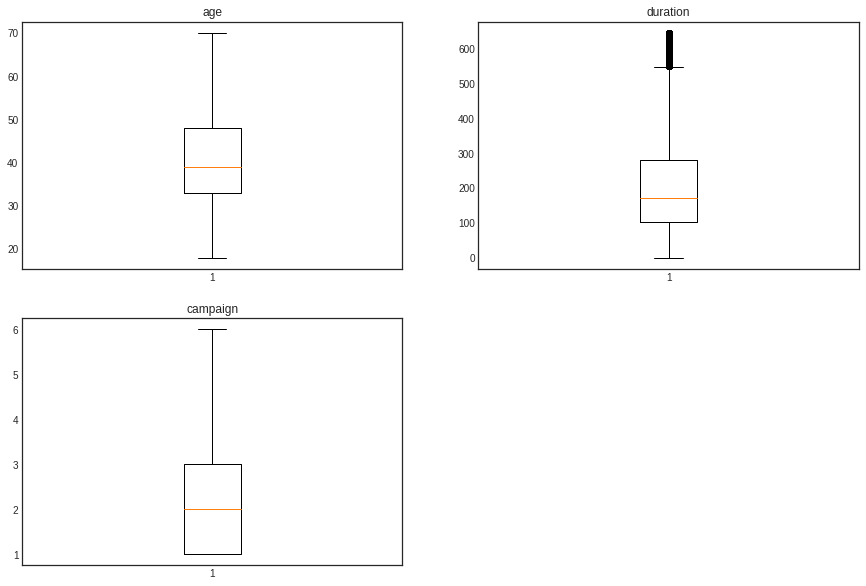

In [47]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(dff['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(dff['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(dff['campaign'])
ax.set_title('campaign')

In [63]:
dff

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,services,single,secondary,0,473,1,0,cellular,7,jul,624,5,-1,0,unknown,0
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [ ]:
#converting the ipynb file into csv for mysql 

In [ ]:
df.to_csv('bank_df.csv',encoding='utf-8-sig')
files.download('bank_df.csv')

conclusion :  
1)  The duration increases the deposites also increases    
2)More campaign are done in the month of may     
3)The clients who are having no house are showing intrest on deposit and who are having house not showing intrest on deposit as shown in the above fig of housing   
4) Poutcome sucess people are showing intrest in deposit    
5)marital: the ratio of singles are having deposits 
